# TW6

## Linear regression

Students' names:

- 


- 



### Set up 

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Part 0

- Read and run each cell of the given examples: (1) synthetic dataset (2) crime dataset

- Understand the results. In particular, see how feature normalization affects on ridges regression and how the model performance changes when varying alpha parameter values are used in both ridge regression and Lasso regression. 

## Linear models for regression

- Visit Ski-learn web site:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

### Model evaluation metrics for regression

Model evaluation metrics for regression models
Evaluation metrics for classification problems, such as accuracy, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

See more details: https://scikit-learn.org/stable/modules/model_evaluation.html

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$


**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$


Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

## The R2 ("r-squared") Regression Score

- Measures how well a prediction model for regression fits the given data.

- The score is between 0 and 1:

     - A value of 0 corresponds to a constant model that predicts the mean value of all training target values.

     - A value of 1 corresponds to perfect prediction

- Also known as "coefficient of determination"

### Preparing X and Y using pandas
- We already did this process above
- scikit-learn expects X (feature matrix) and Y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

### Dataset 1: Synthetic random data points

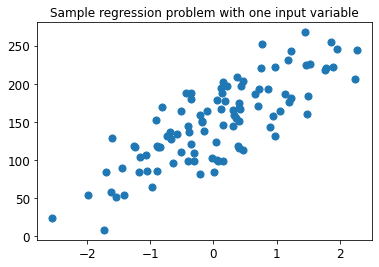

In [3]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap

# synthetic dataset for simple regression
from sklearn.datasets import make_regression

plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                             n_informative=1, bias = 150.0,
                             noise = 30, random_state=0)

plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

#### Linear regression on synthetic dataset


In [4]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state=0)

linreg = LinearRegression().fit(X_train, y_train)

#### Linear regression model coefficient and intercept values \& performance metrics

In [5]:
from sklearn import metrics

print('linear model intercept (b): {:.3f}'.format(linreg.intercept_))
print('linear model coeff (w): {}'.format(linreg.coef_))

# train data R2
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
# test data R2
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))

# make predictions on the testing set and print RMSE
y_pred = linreg.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

linear model intercept (b): 148.446
linear model coeff (w): [45.70870465]
R-squared score (training): 0.679
R-squared score (test): 0.492
RMSE: 33.203


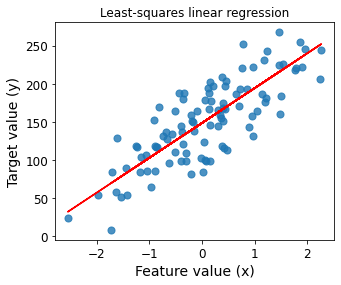

In [6]:
plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8)
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

#### Obtain theta using close form

<img src="images/cf.png" style="width: 200px;">

In [7]:
X_b = np.c_[np.ones((100, 1)), X_R1]  # add x0 = 1 to each instance

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_R1)
theta_best

array([147.55745452,  43.08728116])

#### plot the linear model with scatter plot

### Dataset 2: crime dataset

In [22]:
def load_crime_dataset():
    # Communities and Crime dataset for regression
    # https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized

    # na_values='?'
    crime = pd.read_csv('./data/CommViolPredUnnormalizedData.csv', na_values='?')
    # remove features with poor coverage or lower relevance, and keep ViolentCrimesPerPop target column
    columns_to_keep = [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145]  
    
    crime = crime.iloc[:, columns_to_keep]
    crime = crime.dropna()
    
    X_crime = crime.iloc[:, 0:88]
    y_crime = crime['ViolentCrimesPerPop']

    return (X_crime, y_crime)

# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()

print(X_crime.head())
print(y_crime.head())

   population  householdsize  agePct12t21  agePct12t29  agePct16t24  \
0       11980           3.10        12.47        21.44        10.93   
1       23123           2.82        11.01        21.30        10.48   
2       29344           2.43        11.36        25.88        11.01   
3       16656           2.40        12.55        25.20        12.19   
5      140494           2.45        18.09        32.89        20.04   

   agePct65up  numbUrban  pctUrban  medIncome  pctWWage  ...  \
0       11.33      11980     100.0      75122     89.24  ...   
1       17.18      23123     100.0      47917     78.99  ...   
2       10.28      29344     100.0      35669     82.00  ...   
3       17.57          0       0.0      20580     68.15  ...   
5       13.26     140494     100.0      21577     75.78  ...   

   MedRentPctHousInc  MedOwnCostPctInc  MedOwnCostPctIncNoMtg  NumInShelters  \
0               23.8              21.1                   14.0             11   
1               27.6        

#### Linear regression on crime dataset (without regularization)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state=0)
linreg = LinearRegression().fit(X_train, y_train)

print('Crime dataset')
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

# make predictions on the testing set
y_pred = linreg.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

print('linear model intercept: {}'.format(linreg.intercept_))
print('linear model coeff:\n{}'.format(linreg.coef_))

print('Number of non-zero features: {}'.format(np.sum(linreg.coef_ != 0)))

Crime dataset
R-squared score (training): 0.665
R-squared score (test): 0.450
RMSE: 474.941
linear model intercept: -9016.71379264214
linear model coeff:
[ 1.61892346e-03 -1.16126221e+02  1.58427052e+01 -2.51436949e+01
 -5.09547930e+00 -1.50243459e+01 -2.22569479e-03  1.44541191e+00
 -1.26211929e-02 -4.29699629e+00 -3.53160067e+00 -3.73044041e+00
  1.37007670e+01  6.07862111e+00 -1.20825536e+01  1.15182238e-02
  7.08544840e-04  4.01124376e-03 -3.51059426e+00 -1.71622366e+01
  1.13861555e+01 -4.33232369e+00 -3.29113404e+00  3.94281507e+00
 -4.82314253e+00 -5.88822384e+00  3.54593005e+00  1.47928154e+01
  1.75638912e+02  1.10271278e+01  1.57842241e+02 -3.38159767e+02
 -1.07306638e+02 -1.84872085e+00 -1.78129602e+01  3.19786889e+00
 -3.00741737e-01  5.78891934e+00 -9.32028122e+00 -4.95921133e-03
  4.05915394e+01 -1.29242317e-03  3.91961727e+00 -2.30801612e+00
 -2.80162520e+00  2.39508561e+00 -1.54142172e+00 -3.04514325e+01
  5.31280990e+01 -2.91783821e+01 -1.01230886e+00 -4.22401758e+01
 

#### Ridge regression (regularized regression)

In [24]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state=0)

linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('Crime dataset')

print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))

# make predictions on the testing set
y_pred = linreg.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))

print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))

Crime dataset
R-squared score (training): 0.671
R-squared score (test): 0.494
RMSE: 474.941
ridge regression linear model intercept: -3352.4230358457785
ridge regression linear model coeff:
[ 1.95091438e-03  2.19322667e+01  9.56286607e+00 -3.59178973e+01
  6.36465325e+00 -1.96885471e+01 -2.80715856e-03  1.66254486e+00
 -6.61426604e-03 -6.95450680e+00  1.71944731e+01 -5.62819154e+00
  8.83525114e+00  6.79085746e-01 -7.33614221e+00  6.70389803e-03
  9.78505502e-04  5.01202169e-03 -4.89870524e+00 -1.79270062e+01
  9.17572382e+00 -1.24454193e+00  1.21845360e+00  1.03233089e+01
 -3.78037278e+00 -3.73428973e+00  4.74595305e+00  8.42696855e+00
  3.09250005e+01  1.18644167e+01 -2.05183675e+00 -3.82210450e+01
  1.85081589e+01  1.52510829e+00 -2.20086608e+01  2.46283912e+00
  3.29328703e-01  4.02228467e+00 -1.12903533e+01 -4.69567413e-03
  4.27046505e+01 -1.22507167e-03  1.40795790e+00  9.35041855e-01
 -3.00464253e+00  1.12390514e+00 -1.82487653e+01 -1.54653407e+01
  2.41917002e+01 -1.32497562e+

#### Ridge regression with feature normalization

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('Crime dataset')
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))

# make predictions on the testing set
y_pred = linreg.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))

print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))

Crime dataset
R-squared score (training): 0.615
R-squared score (test): 0.599
RMSE: 474.941
ridge regression linear model intercept: 933.390638504413
ridge regression linear model coeff:
[  88.68827454   16.48947987  -50.30285445  -82.90507574  -65.89507244
   -2.27674244   87.74108514  150.94862182   18.8802613   -31.05554992
  -43.13536109 -189.44266328   -4.52658099  107.97866804  -76.53358414
    2.86032762   34.95230077   90.13523036   52.46428263  -62.10898424
  115.01780357    2.66942023    6.94331369   -5.66646499 -101.55269144
  -36.9087526    -8.7053343    29.11999068  171.25963057   99.36919476
   75.06611841  123.63522539   95.24316483 -330.61044265 -442.30179004
 -284.49744001 -258.37150609   17.66431072 -101.70717151  110.64762887
  523.13611718   24.8208959     4.86533322  -30.46775619   -3.51753937
   50.57947231   10.84840601   18.27680946   44.11189865   58.33588176
   67.08698975  -57.93524659  116.1446052    53.81163718   49.01607711
   -7.62262031   55.14288543  -5

#### Ridge regression with regularization parameter: alpha

In [26]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 88, r-squared training: 0.67, r-squared test: 0.49

Alpha = 1.00
num abs(coeff) > 1.0: 87, r-squared training: 0.66, r-squared test: 0.56

Alpha = 10.00
num abs(coeff) > 1.0: 87, r-squared training: 0.63, r-squared test: 0.59

Alpha = 20.00
num abs(coeff) > 1.0: 88, r-squared training: 0.61, r-squared test: 0.60

Alpha = 50.00
num abs(coeff) > 1.0: 86, r-squared training: 0.58, r-squared test: 0.58

Alpha = 100.00
num abs(coeff) > 1.0: 87, r-squared training: 0.55, r-squared test: 0.55

Alpha = 1000.00
num abs(coeff) > 1.0: 84, r-squared training: 0.31, r-squared test: 0.30



### Lasso regression

In [27]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

print('Crime dataset')

print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))

# make predictions on the testing set
y_pred = linreg.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
    
print('lasso regression linear model intercept: {}'.format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'.format(linlasso.coef_))

print('Non-zero features: {}'.format(np.sum(linlasso.coef_ != 0)))
 
print('Features with non-zero weight (sorted by absolute magnitude):')
for e in sorted (list(zip(list(X_crime), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Crime dataset
R-squared score (training): 0.631
R-squared score (test): 0.624

RMSE: 474.941
lasso regression linear model intercept: 1186.6120619985797
lasso regression linear model coeff:
[    0.             0.            -0.          -168.18346054
    -0.            -0.             0.           119.6938194
     0.            -0.             0.          -169.67564456
    -0.             0.            -0.             0.
     0.             0.            -0.            -0.
     0.            -0.             0.             0.
   -57.52991966    -0.            -0.             0.
   259.32889226    -0.             0.             0.
     0.            -0.         -1188.7396867     -0.
    -0.            -0.          -231.42347299     0.
  1488.36512229     0.            -0.            -0.
    -0.             0.             0.             0.
     0.             0.            -0.             0.
    20.14419415     0.             0.             0.
     0.             0.           339.04468804

#### Lasso regression with regularization parameter: alpha

In [ ]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

## TW6 Part 1

Apply the following regression model on breast cancer dataset

(1) Linear regression without regularization

(2) Ridge regression 

(3) Ridge regression with feature normalization

(4) Ridge regression with regularization parameter: alpha

(5) Lasso regression

(6) Lasso regression with regularization parameter: alpha

### Dataset 3: Breast cancer dataset

In [29]:
from sklearn.datasets import load_breast_cancer

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

print(cancer.feature_names)
print(y_cancer)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0

(1) Linear regression without regularization

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)
linreg = LinearRegression().fit(X_train, y_train)

print('Cancer dataset')
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

# make predictions on the testing set
y_pred = linreg.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

print('linear model intercept: {}'.format(linreg.intercept_))
print('linear model coeff:\n{}'.format(linreg.coef_))

print('Number of non-zero features: {}'.format(np.sum(linreg.coef_ != 0)))

Cancer dataset
R-squared score (training): 0.782
R-squared score (test): 0.729
RMSE: 0.251
linear model intercept: 3.2643236829496276
linear model coeff:
[ 1.95664033e-01 -1.24998359e-02 -1.83925145e-02 -3.08554299e-04
 -6.58769659e-01  4.67316114e+00 -1.41047944e+00 -1.79519061e+00
 -1.02466251e+00 -8.16682870e-01 -6.95506836e-01 -2.65194673e-02
  6.52894932e-02  3.22253562e-04 -1.16323309e+01 -4.43943865e-02
  3.04134165e+00 -8.31729413e+00 -2.44644000e+00  1.96844051e+01
 -1.78964757e-01 -2.00410588e-04 -4.02896117e-03  1.17548563e-03
 -4.04988322e-01 -1.15267671e-01 -4.11583121e-01 -9.11239745e-01
 -1.12925131e-01 -5.02459596e+00]
Number of non-zero features: 30


(2) Ridge regression 

In [31]:
from sklearn.linear_model import Ridge

linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('Cancer dataset')

print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))

# make predictions on the testing set
y_pred = linreg.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))

print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))


Cancer dataset
R-squared score (training): 0.718
R-squared score (test): 0.701
RMSE: 0.251
ridge regression linear model intercept: 2.8876581523658027
ridge regression linear model coeff:
[ 8.95459514e-02  4.96576604e-03 -6.53071472e-03 -9.38715208e-06
 -1.70744323e-02 -2.48627421e-02 -4.93503540e-02 -2.77020642e-02
 -3.06915402e-02 -4.70309146e-03 -4.64609813e-02 -1.10244435e-02
 -1.66584359e-02 -3.44749865e-04 -2.54152959e-03  2.62285611e-04
 -1.16547194e-03 -2.54907417e-03 -5.31339660e-03 -7.79367812e-05
 -1.60523115e-01 -1.55701325e-02 -6.49252297e-03  1.01356127e-03
 -3.15652552e-02 -8.47221763e-02 -1.40803334e-01 -5.21846681e-02
 -6.76483639e-02 -1.53442711e-02]
Number of non-zero features: 30


(3) Ridge regression with feature normalization

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('Cancer dataset')
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))

# make predictions on the testing set
y_pred = linreg.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))

print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))

Cancer dataset
R-squared score (training): 0.698
R-squared score (test): 0.696
RMSE: 0.251
ridge regression linear model intercept: 1.407528762029437
ridge regression linear model coeff:
[-0.15953124 -0.14083798 -0.15623107 -0.11422388 -0.0739519  -0.07506947
 -0.11895532 -0.191061   -0.07479776  0.06879125 -0.07719428 -0.00264562
 -0.05536349 -0.03226534  0.02846709  0.04759806  0.03104476 -0.02518334
 -0.00139326  0.04768871 -0.20126066 -0.16533176 -0.18362235 -0.1237563
 -0.13628769 -0.11408258 -0.13774801 -0.27762586 -0.13141221 -0.05403194]
Number of non-zero features: 30


(4) Ridge regression with regularization parameter: alpha

In [54]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, .01, .1, 1, 10, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.3f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.000
num abs(coeff) > 1.0: 8, r-squared training: 0.78, r-squared test: 0.73

Alpha = 0.010
num abs(coeff) > 1.0: 5, r-squared training: 0.78, r-squared test: 0.73

Alpha = 0.100
num abs(coeff) > 1.0: 3, r-squared training: 0.77, r-squared test: 0.74

Alpha = 1.000
num abs(coeff) > 1.0: 0, r-squared training: 0.75, r-squared test: 0.73

Alpha = 10.000
num abs(coeff) > 1.0: 0, r-squared training: 0.72, r-squared test: 0.71

Alpha = 100.000
num abs(coeff) > 1.0: 0, r-squared training: 0.57, r-squared test: 0.58

Alpha = 1000.000
num abs(coeff) > 1.0: 0, r-squared training: 0.16, r-squared test: 0.16



(5) Lasso regression

In [38]:
from sklearn.linear_model import Lasso

linlasso = Lasso(alpha=.01, max_iter = 10000).fit(X_train_scaled, y_train)

print('Cancer dataset')

print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))

# make predictions on the testing set
y_pred = linreg.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
    
print('lasso regression linear model intercept: {}'.format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'.format(linlasso.coef_))

print('Non-zero features: {}'.format(np.sum(linlasso.coef_ != 0)))
 
print('Features with non-zero weight (sorted by absolute magnitude):')
for e in sorted (list(zip(list(X_crime), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Cancer dataset
R-squared score (training): 0.690
R-squared score (test): 0.688

RMSE: 0.251
lasso regression linear model intercept: 1.318335153150341
lasso regression linear model coeff:
[-0.         -0.09693723 -0.         -0.         -0.         -0.
 -0.         -0.00976008 -0.          0.         -0.         -0.
 -0.         -0.         -0.          0.          0.         -0.
 -0.          0.         -0.67533596 -0.08334443 -0.         -0.
 -0.         -0.         -0.         -1.05550389 -0.         -0.        ]
Non-zero features: 5
Features with non-zero weight (sorted by absolute magnitude):
	PctOccupMgmtProf, -1.056
	PctNotHSGrad, -0.675
	householdsize, -0.097
	PctBSorMore, -0.083
	pctUrban, -0.010


(6) Lasso regression with regularization parameter: alpha

In [47]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.0001, .001, .01, .1, 1]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.4f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.0001
Features kept: 26, r-squared training: 0.78, r-squared test: 0.74

Alpha = 0.0010
Features kept: 15, r-squared training: 0.74, r-squared test: 0.72

Alpha = 0.0100
Features kept: 5, r-squared training: 0.69, r-squared test: 0.69

Alpha = 0.1000
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00

Alpha = 1.0000
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00



## Part 2

- Read and run each cell of the given examples: (1) synthetic dataset (2) crime dataset
- Understand the results

I edited code from the crime example to make it applicable to the cancer data. I used the same training and test set distributions for all the problems to allow for even comparisons. I found that it is important to select the right alpha value in order to tune the sensitivity of the regularization method properly. I also found that in lasso regression, due to the coefficients not being squared in the cost function, the coefficients converge to 0 quicker than in ridge regression.